<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. データをきちんと取り込もう


## 2.2 人の知覚に近づける



In [ ]:
# サンプル音声を取得
!wget https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample_2.wav

--2023-07-30 00:48:55--  https://github.com/kan-bayashi/asj-espnet2-tutorial/raw/master/static/audios/ja_sample_2.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample_2.wav [following]
--2023-07-30 00:48:55--  https://raw.githubusercontent.com/kan-bayashi/asj-espnet2-tutorial/master/static/audios/ja_sample_2.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157244 (154K) [audio/wav]
Saving to: ‘ja_sample_2.wav’

ja_sample_2.wav     100%[===================>] 153.56K  --.-KB/s    in 0.02s   

2023-07-30 00:48:55 (6.53 MB/s) - ‘ja_sa

In [ ]:
import IPython.display
IPython.display.Audio("ja_sample_2.wav")

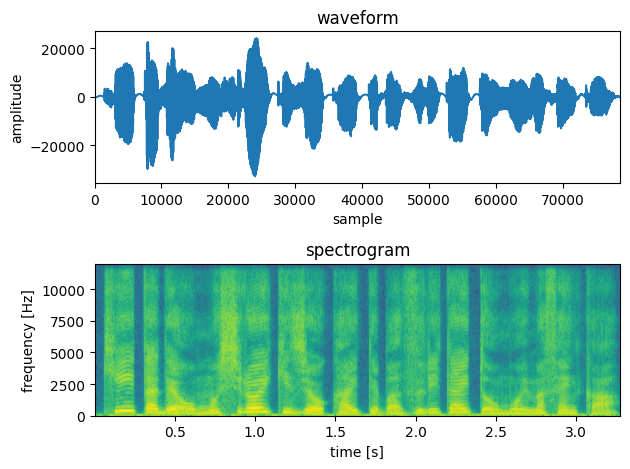

In [ ]:
# スペクトログラムを表示
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

fs, speech_data = read('ja_sample_2.wav')

plt.subplot(2,1,1)
plt.title("waveform")
plt.plot(speech_data)
plt.xlim(0, len(speech_data))
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.title("spectrogram")
plt.specgram(speech_data, Fs=fs)
plt.xlabel("time [s]")
plt.ylabel("frequency [Hz]")

plt.tight_layout()

## 2.3 特徴抽出をしやすくする処理

ノイズが付加された画像に対してノイズフィルタを適用してみます。

In [26]:
# サンプル画像を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg

--2023-08-04 05:13:34--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg [following]
--2023-08-04 05:13:34--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1750 (1.7K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>]   1.71K  --.-KB/s    in 0s      

2023-08-04 05:13:34 (18.3 MB/s) - ‘sample1.jpg’ 

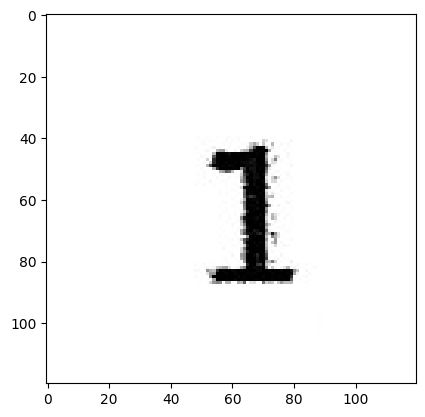

In [34]:
# 画像の読み込みと表示

import numpy as np
import matplotlib.pyplot as plt

imagefile = 'sample1.jpg'
im = plt.imread(imagefile)
plt.imshow(im)
plt.gray()

平均値フィルタを適用

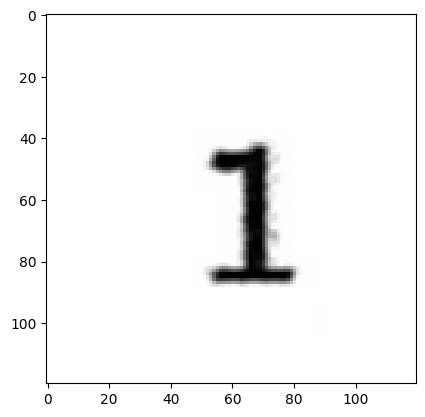

In [36]:
(h, w) = im.shape

filter1 = np.full((3,3), 1/9)
im2 = np.full_like(im, 255)

for y in range(1,h-1):
  for x in range(1,w-1):
    t = im[x-1:x+2, y-1:y+2]
    im2[x,y] = np.sum(np.multiply(t, filter1))

plt.imshow(im2)
plt.gray()

SciPy の Multidimensional image processing ライブラリ [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) を使い、関数化したコード

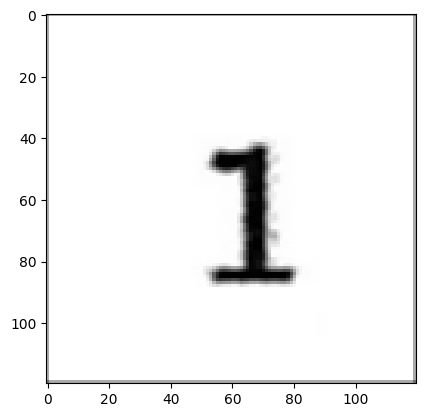

In [37]:
from scipy.ndimage import convolve

def apply_average_filter(image):
  # Define the 3x3 kernel for the average filter
  kernel = np.full((3,3), 1/9)

  # Apply the average filter using the convolve function
  # extension of input image is done by constant value (0.0)
  filtered_image = convolve(image, kernel, mode='constant', cval=0.0)

  return filtered_image

plt.imshow(apply_average_filter(im))
plt.gray()

## 演習問題

上記の例を参考に、フィルタサイズ 5x5 のメディアンフィルタを実装せよ。


上記処理に加えて、ストライドを2にして画像圧縮を行え。


Sobelフィルタを実装せよ。

## 解答例


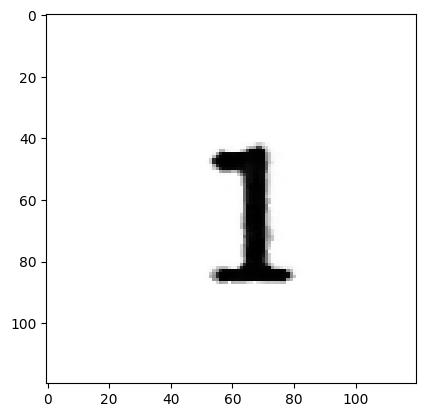

In [38]:
# メディアンフィルタ (5x5)
im3 = np.full_like(im, 255)

for y in range(2,h-2):
  for x in range(2,w-2):
    im3[x,y] = np.median(im[x-2:x+3, y-2:y+3])

plt.imshow(im3)
plt.gray()

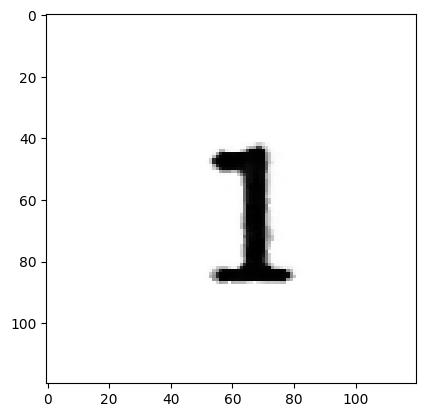

In [39]:
# scipyを使った別解
from scipy.ndimage import median_filter

plt.imshow(median_filter(im, size=5))
plt.gray()

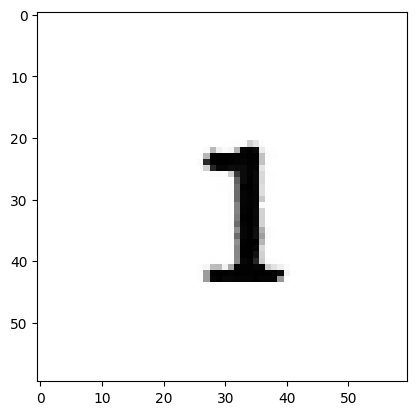

In [40]:
# メディアンフィルタ (5x5)
# scipy.ndimage の median_filter では stride が指定できない
s = 2 # stride
im4 = np.full((h//s, w//s), 255)

for y in range(2,h-2,s):
  for x in range(2,w-2,s):
    im4[x//s,y//s] = np.median(im[x-2:x+3, y-2:y+3])

plt.imshow(im4)
plt.gray()

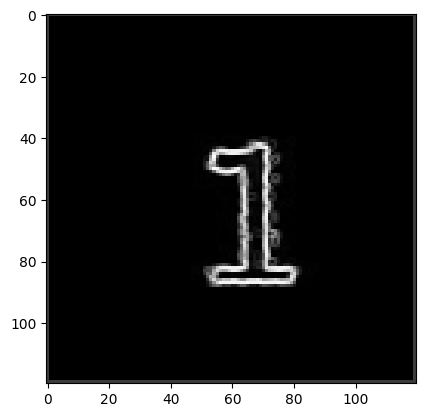

In [41]:
# Sobelフィルタ

filter2x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
im5 = np.full_like(image, 255, np.float32)

for y in range(1,h-1):
  for x in range(1,w-1):
    t = im[x-1:x+2, y-1:y+2]
    im5[x,y] = np.sqrt(np.sum(t * filter2x)**2 + np.sum(t * filter2y)**2)

plt.imshow(im5)
plt.gray()